c:\Users\SD-LORENZO-PC\anaconda3\envs\gdal\Lib\site-packages\osgeo\ogr.py:601: FutureWarning: Neither ogr.UseExceptions() nor ogr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Map saved as manhattan_map.png


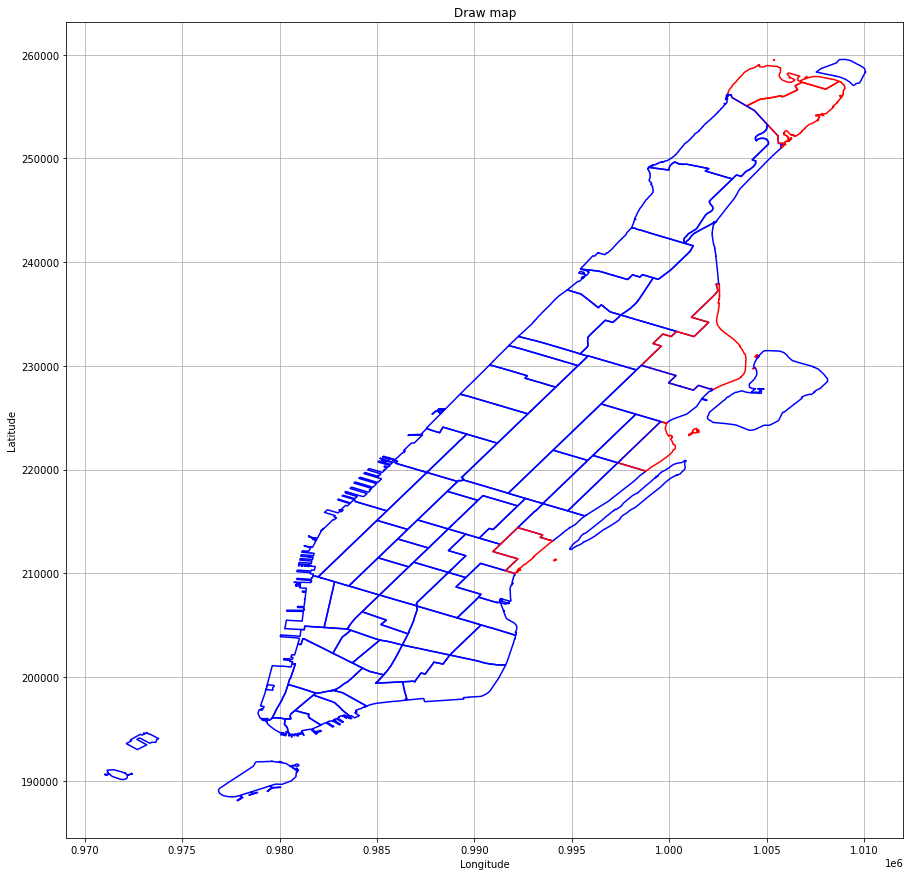

Click the link below to download the image:


c:\Users\SD-LORENZO-PC\pyproject\rndPy\Geospatial\manhattan_map.png

In [1]:
                                      =

def plot_shapefile(shapefile_path, output_path="output.png"):
    ds = ogr.Open(shapefile_path)
    if ds is None:
        print("Failed to open shapefile.")
        return
    
    layer = ds.GetLayer()
    
    plt.figure(figsize=(15, 15))
    
    for feature in layer:
        geom = feature.GetGeometryRef()

        if geom.GetGeometryName() == 'POLYGON' or geom.GetGeometryName() == 'MULTIPOLYGON':
            if geom.GetGeometryName() == 'MULTIPOLYGON':
                for polygon in geom:
                    for ring in polygon:
                        if ring and ring.GetPointCount() > 0:
                            x = [point[0] for point in ring.GetPoints()]
                            y = [point[1] for point in ring.GetPoints()]
                            plt.plot(x, y, color='red')
            else:
                for ring in geom:
                    if ring and ring.GetPointCount() > 0:
                        x = [point[0] for point in ring.GetPoints()]
                        y = [point[1] for point in ring.GetPoints()]
                        plt.plot(x, y, color='blue')

        elif geom.GetGeometryName() == 'LINESTRING' or geom.GetGeometryName() == 'MULTILINESTRING':
            x = [point[0] for point in geom.GetPoints()] if geom.GetPointCount() > 0 else []
            y = [point[1] for point in geom.GetPoints()] if geom.GetPointCount() > 0 else []
            plt.plot(x, y, color='green')
        else:
            print(f"Unsupported geometry type: {geom.GetGeometryName()}")
    
    plt.title("Draw map")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    
    plt.savefig(output_path)
    print(f"Map saved as {output_path}")
    
    plt.show()
    
    ds = None
    
    try:
        from IPython.display import FileLink # type: ignore
        print("Click the link below to download the image:")
        return FileLink(output_path)
    except ImportError:
        download_path = os.path.join(os.path.expanduser("~"), "Downloads", output_path)
        shutil.move(output_path, download_path)
        print(f"Image has been saved to {download_path}")

shapefile_path = r'C:\Users\SD-LORENZO-PC\Downloads\python_class-main\python_class-main\GDAl_Read_Vector\shapefile\manhattan_zone.shp'

plot_shapefile(shapefile_path, "manhattan_map.png")
